# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [72]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [73]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [74]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [76]:
mydata = app_train.loc[:,["TARGET","DAYS_BIRTH","CODE_GENDER","AMT_INCOME_TOTAL"]]
t = mydata["DAYS_BIRTH"] / 365
mydata["AGES"] = t.round()
mydata["INCOME_INTERVAL"] = pd.qcut(mydata["AMT_INCOME_TOTAL"], 5)
mydata.head()

,TARGET,DAYS_BIRTH,CODE_GENDER,AMT_INCOME_TOTAL,AGES,INCOME_INTERVAL
0,1,9461,M,202500.0,26.0,"(162000.0, 225000.0]"
1,0,16765,F,270000.0,46.0,"(225000.0, 117000000.0]"
2,0,19046,M,67500.0,52.0,"(25649.999, 99000.0]"
3,0,19005,F,135000.0,52.0,"(99000.0, 135000.0]"
4,0,19932,M,121500.0,55.0,"(99000.0, 135000.0]"


Text(0.5, 0.98, 'Discrete Income')

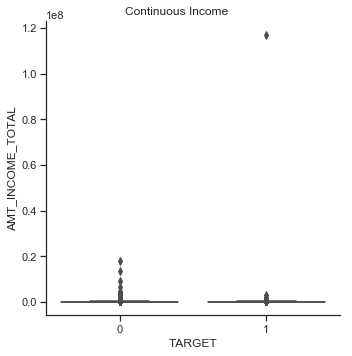

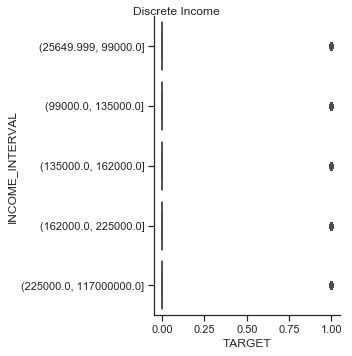

In [19]:
ax1 = sns.catplot(x="TARGET", y="AMT_INCOME_TOTAL", kind="box", data=mydata)
ax1.fig.suptitle("Continuous Income")

ax2 = sns.catplot(x="TARGET", y="INCOME_INTERVAL", kind="box", data=mydata)
ax2.fig.suptitle("Discrete Income")

Text(0.5, 0.98, 'Discrete Income')

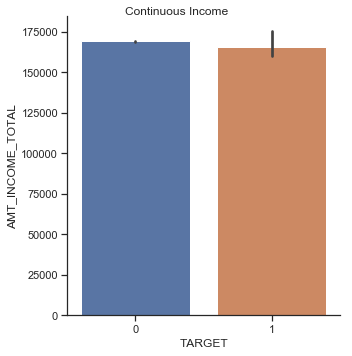

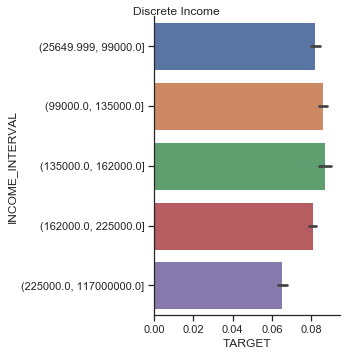

In [20]:
ax1 = sns.catplot(x="TARGET", y="AMT_INCOME_TOTAL", kind="bar", data=mydata)
ax1.fig.suptitle("Continuous Income")

ax2 = sns.catplot(x="TARGET", y="INCOME_INTERVAL", kind="bar", data=mydata)
ax2.fig.suptitle("Discrete Income")

In [101]:
mydata["CODE_GENDER"] = mydata[mydata.loc[:,"CODE_GENDER"]!="XNA"]["CODE_GENDER"]
newdata = mydata.groupby(["TARGET","CODE_GENDER"]).size().reset_index()
newdata.rename(columns = {0:"COUNT"}, inplace = True)
newdata

,TARGET,CODE_GENDER,COUNT
0,0,F,188278
1,0,M,94404
2,1,F,14170
3,1,M,10655


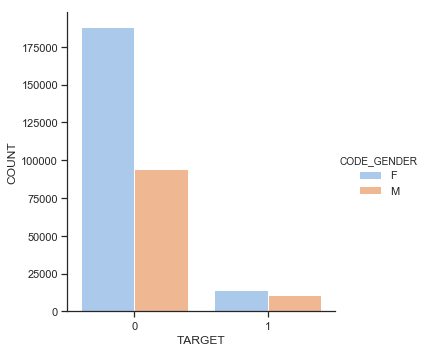

In [102]:
sns.catplot(x="TARGET", y="COUNT", hue="CODE_GENDER", kind="bar", data=newdata, palette="pastel")

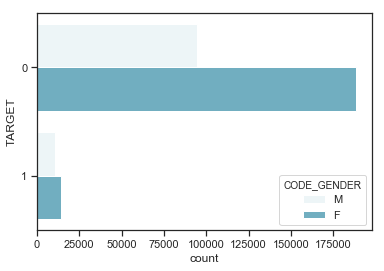

In [100]:
sns.countplot(y="TARGET", hue="CODE_GENDER", data=mydata, color="c")